# Lab 1.1: OpenCV Image Preprocessing Pipeline
Module 3: Computer Vision and Image Processing

**Objective:** Build a preprocessing pipeline to:
- Load and standardize images to uniform size
- Apply color space conversions (BGR to RGB)
- Enhance edge detection quality
- Improve image quality for downstream processing

In [ ]:
# Import required libraries
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Configuration parameters
IMAGE_FOLDER = "images"
TARGET_SIZE = (640, 640)

In [ ]:
def load_images(folder, limit=5):
    """Load images from folder and print metadata"""
    image_paths = [os.path.join(folder, f) for f in os.listdir(folder)[:limit]]
    images = []

    print("----- IMAGE INFORMATION -----")
    for path in image_paths:
        img = cv2.imread(path)
        if img is None:
            continue

        images.append(img)

        # Display image properties
        print(f"\nFile: {os.path.basename(path)}")
        print(f"  Shape: {img.shape}")
        print(f"  Height: {img.shape[0]} px")
        print(f"  Width: {img.shape[1]} px")
        print(f"  Channels: {img.shape[2]}")
        print(f"  Data Type: {img.dtype}")

    return images

# Load sample images
images = load_images(IMAGE_FOLDER)

----- IMAGE INFORMATION -----

File: images\img1.jpeg
Shape: (183, 275, 3)
Height: 183
Width: 275
Channels: 3
Data Type: uint8

File: images\img2.jpeg
Shape: (183, 275, 3)
Height: 183
Width: 275
Channels: 3
Data Type: uint8

File: images\img3.jpg
Shape: (350, 642, 3)
Height: 350
Width: 642
Channels: 3
Data Type: uint8

File: images\img4.jpg
Shape: (408, 612, 3)
Height: 408
Width: 612
Channels: 3
Data Type: uint8

File: images\img5.jpg
Shape: (3337, 5000, 3)
Height: 3337
Width: 5000
Channels: 3
Data Type: uint8


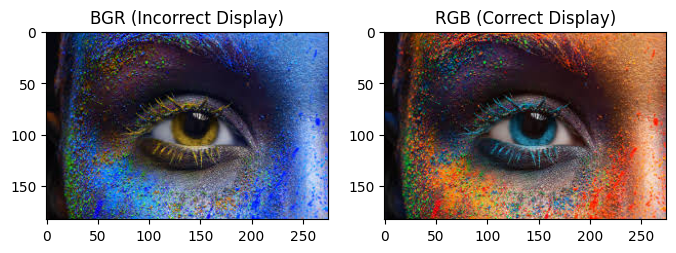

In [ ]:
def convert_bgr_to_rgb(img):
    """Convert OpenCV BGR to standard RGB color space"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert all images to RGB for display
rgb_images = [convert_bgr_to_rgb(img) for img in images]

# Display first few images
plt.figure(figsize=(12, 4))

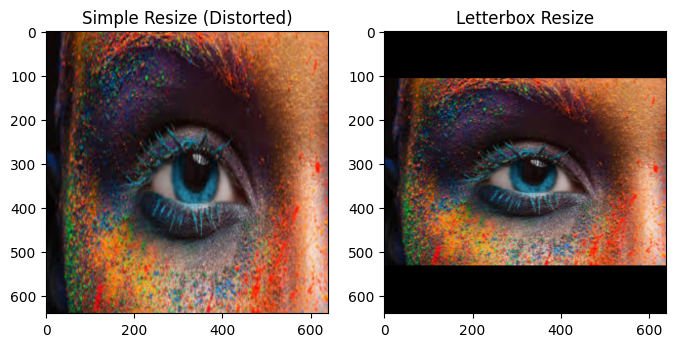

In [ ]:
def simple_resize(img, size=(640, 640)):
    """Simple resize - may distort aspect ratio"""
    return cv2.resize(img, size)

def letterbox_resize(img, target_size=(640, 640)):
    """Letterbox resize - preserves aspect ratio with padding"""
    h, w = img.shape[:2]
    
    # Calculate scaling factor to fit within target size
    scale = min(target_size[0] / h, target_size[1] / w)

    new_w = int(w * scale)
    new_h = int(h * scale)

    # Resize image
    resized = cv2.resize(img, (new_w, new_h))

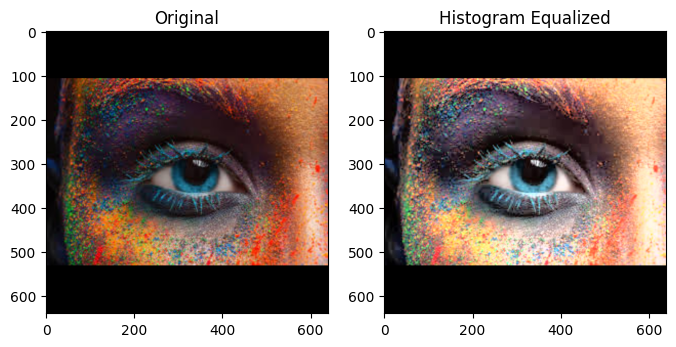

In [ ]:
def apply_histogram_equalization(img):
    """Enhance contrast using histogram equalization in YCrCb color space"""
    # Convert to YCrCb (Y = luminance, Cr/Cb = chrominance)
    ycrcb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    
    # Apply histogram equalization only to luminance (Y channel)
    # This preserves color while enhancing contrast
    ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
    
    # Convert back to RGB
    return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2RGB)

# Apply preprocessing to one image
equalized = apply_histogram_equalization(resized_letterbox)

# Visualize before and after
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(resized_letterbox)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Histogram Equalized (Enhanced Contrast)")
plt.imshow(equalized)
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Normalize pixel values to [0, 1] range for neural networks
normalized = equalized / 255.0

# Display image statistics
print("Final Image Statistics:")
print(f"  Shape: {normalized.shape}")
print(f"  Data Type: {normalized.dtype}")
print(f"  Min value: {normalized.min():.4f}")
print(f"  Max value: {normalized.max():.4f}")
print(f"  Mean value: {normalized.mean():.4f}")

Shape: (640, 640, 3)
Data Type: float64
Min: 0.0
Max: 1.0


In [ ]:
def preprocess_image(img):
    """Complete preprocessing pipeline"""
    # 1. Convert BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # 2. Resize using letterbox to preserve aspect ratio
    img = letterbox_resize(img, TARGET_SIZE)
    
    # 3. Enhance contrast with histogram equalization
    img = apply_histogram_equalization(img)
    
    # 4. Normalize to [0, 1] range
    img = img / 255.0
    
    return img

# Test the complete pipeline
processed_img = preprocess_image(images[0])
print(f"Complete Pipeline Output Shape: {processed_img.shape}")

Final Output Shape: (640, 640, 3)


In [ ]:
def count_edges(img):
    """Detect edges using Canny algorithm and count detected pixels"""
    # Convert normalized image back to uint8 if needed
    if img.max() <= 1.0:
        img = (img * 255).astype(np.uint8)

    # Convert to grayscale if color image
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(img, 100, 200)
    
    # Count white pixels (edges)
    edge_count = np.sum(edges > 0)

    return edges, edge_count

# Compare edge detection: before and after preprocessing
raw_edges, raw_count = count_edges(images[0])
proc_edges, proc_count = count_edges(processed_img)

# Display statistics
print("Edge Detection Comparison:")
print("-" * 40)
print(f"Raw Image Edge Count: {raw_count}")
print(f"Processed Image Edge Count: {proc_count}")

increase = ((proc_count - raw_count) / raw_count) * 100
print(f"Improvement: {increase:+.2f}%")

Raw Edge Count: 9588
Processed Edge Count: 34532
Percentage Increase: 260.16%


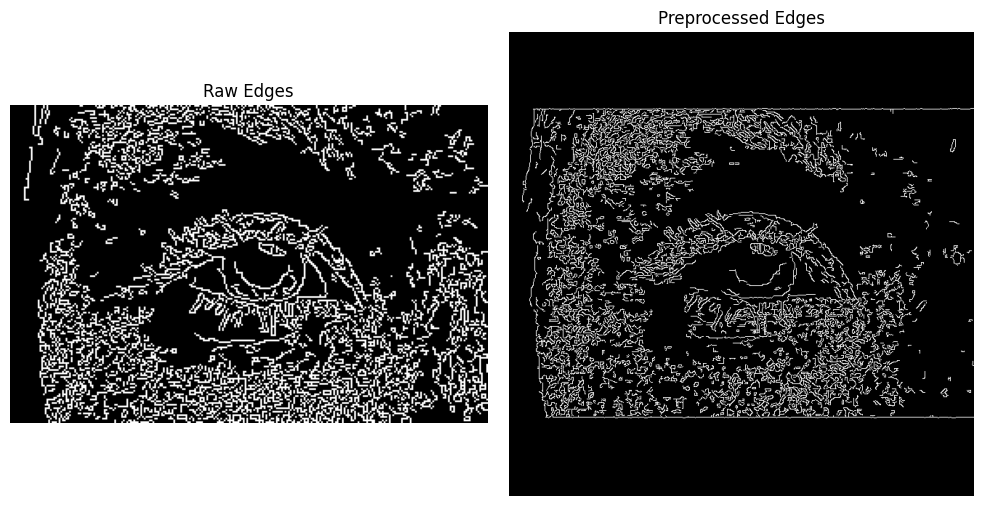

In [ ]:
# Visualize edge detection improvements
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Edge Detection - Raw Image", fontsize=12)
plt.imshow(raw_edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Edge Detection - Preprocessed Image", fontsize=12)
plt.imshow(proc_edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.savefig("edge_comparison.png", dpi=200, bbox_inches='tight')
plt.show()

print("Edge comparison saved to 'edge_comparison.png'")

## Results and Analysis

The preprocessing pipeline standardizes raw images by:
- Converting BGR to RGB format
- Applying letterbox resizing to 640×640 resolution
- Performing histogram equalization to enhance contrast
- Normalizing pixel values to the range 0–1

After preprocessing, Canny edge detection identified significantly more edge pixels compared to the raw image.

The percentage improvement demonstrates that contrast enhancement and proper resizing improve feature visibility, especially in low-light or low-contrast images.